# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import binom
import matplotlib.pyplot as plt

## 1. Binomial Distribution

##### Using Numpy Random Binomial

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


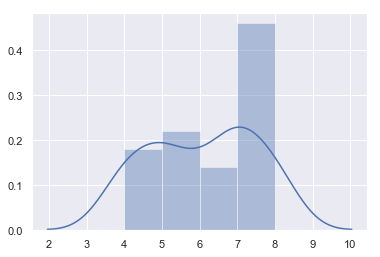

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
N = 10
rs = RandomState(76321654)
V = rs.binomial(N,0.6,10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])

#### Using Scipy Stats Bernoulli

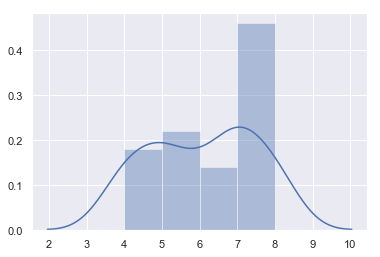

In [3]:
rs = RandomState(76321654)
r = binom.rvs(N,0.6, size = 10000,  random_state= rs).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(r[4])

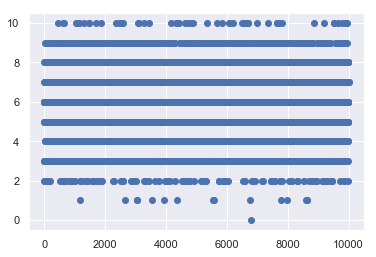

In [4]:
plt.scatter(range(0,V.shape[0] * V.shape[1]),V.flatten(), alpha=1)
plt.show()

### 1.2 Test NMF for Data coming from Binomail Distribution

In [5]:
p = 0.6
rs = RandomState(76321654)
N = 5
V = binom.rvs(N,p, size = 10000,  random_state= rs).reshape(200,50)
n = 10


##### Test the cast function

In [6]:
from MatrixFactorization.NMF import cast_to_limit
B = np.random.random_sample((200,10))
C = np.random.random_sample((10,50))

dot_product = cast_to_limit(B,C,N)

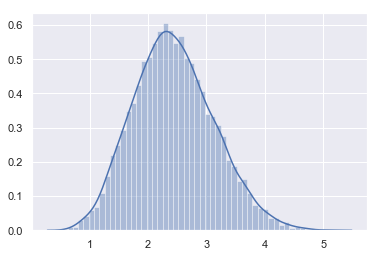

In [7]:
sns.set(color_codes=True)
sns.distplot((B.dot(C)).flatten(), label='original')

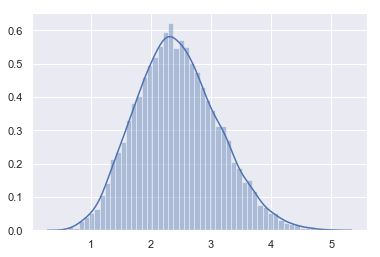

In [8]:
sns.distplot(dot_product.flatten(), label='dot_product')

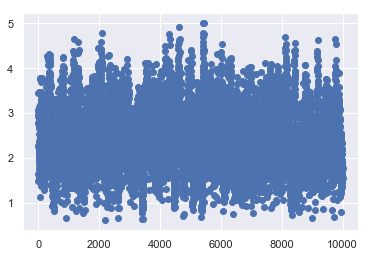

In [9]:
plt.scatter(range(0,dot_product.shape[0]*dot_product.shape[1]),dot_product, alpha=1)
plt.show()

#### LOG Likelihood for Binomail

In [11]:
import math
from scipy.special import factorial
def neg_log_likelihood_binom(V,W,H,N,p=0.6):
    
    A = W.dot(H)
    #indices = np.where(A>=N)
    #A[indices] = N - 1e-5
  
    
    logs_likelihoods = binom.logpmf(V,N,A/N)
    neg_logs = - logs_likelihoods
    
    return np.sum(neg_logs)

In [11]:
from scipy.special import factorial
def neg_log_likelihood_binom(V,W,H,N,p=0.6):
    
    A = W.dot(H)
    indices = np.where(A>=N)
    A[indices] = N - 1e-5
  
    likelihoods = (N / (factorial(V) * factorial(N-V))) * np.power(A/N,V) * np.power((1-A/N),N-V)
    logs_likelihoods = np.log(likelihoods)
    neg_logs = - logs_likelihoods
    
    return np.sum(neg_logs)

In [13]:
import math
from scipy.special import factorial
def neg_log_likelihood_binom(V,W,H,N,p=0.6):
    
    A = W.dot(H)
    #indices = np.where(A>=N)
    #A[indices] = N - 1e-5
  
    
    logs_likelihoods = binom.logpmf(V,N,A/N)
    neg_logs = - logs_likelihoods
    
    return np.sum(neg_logs)

### Sklearn Implementation

In [14]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = mean_squared_error(V, Ws.dot(Hs))
print('Mean Squared Error Between Sklearn Results and V :' + str(diffS))
diffS = neg_log_likelihood_binom(V, Ws, Hs,N,p)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between Sklearn Results and V :0.7830199844396029
Average Negative Log Likelihood Between Sklearn Results and V :nan


### My Implementation Bernoulli

In [21]:
## Test the zeta function first to be in the domain [0,N]
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'binomial', phi_update=True, max_iterations=0, N =n)
W, H = nmfM.fit_transform(V)

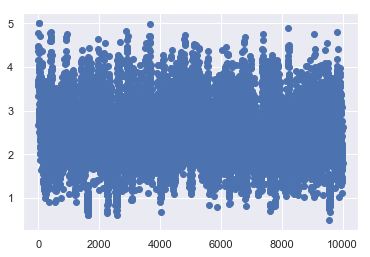

In [22]:
dot_product = cast_to_limit(W,H,N)
plt.scatter(range(0,dot_product.shape[0]*dot_product.shape[1]),dot_product, alpha=1)
plt.show()

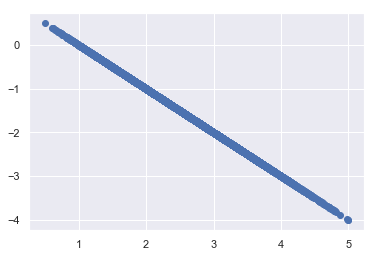

In [23]:
plt.scatter(dot_product,(1-dot_product), alpha=1)
plt.show()

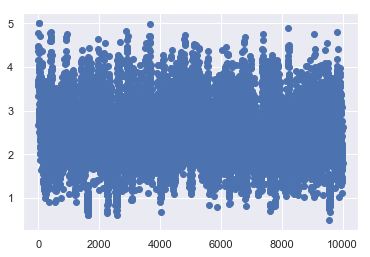

In [26]:
from MatrixFactorization.NMF import binomial_apply_zeta
applied = np.divide(1,np.multiply(dot_product,1-dot_product))
plt.scatter(range(0,applied.shape[0]*applied.shape[1]),dot_product, alpha=1)
plt.show()

In [27]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'binomial', phi_update=True, N =n)
W, H = nmfM.fit_transform(V)
diffM = mean_squared_error(V, W.dot(H))
print('Mean Squared Error Between My Results and V :' + str(diffM))
diffS = neg_log_likelihood_binom(V, W, H,N,p)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between My Results and V :0.8060122130806974
Average Negative Log Likelihood Between Sklearn Results and V :nan


### Combination of My and Sklearn

In [28]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'binomial',N=n)
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =mean_squared_error(V, W2.dot(H2))
print('Mean Squared Error Between My Results and V :' + str(diffM2))
diffS = neg_log_likelihood_binom(V, W2, H2,N)
print('Average Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Mean Squared Error Between My Results and V :0.8713353073374955
Average Negative Log Likelihood Between Sklearn Results and V :nan


### Compare the three Approaches

In [30]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Binomial
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'binomial', N = N, phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Beinomial
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'binomial', N =N)
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_binom(V, Ws, Hs,N)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_binom(V, W, H,N)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_binom(V, W2 , H2,N)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


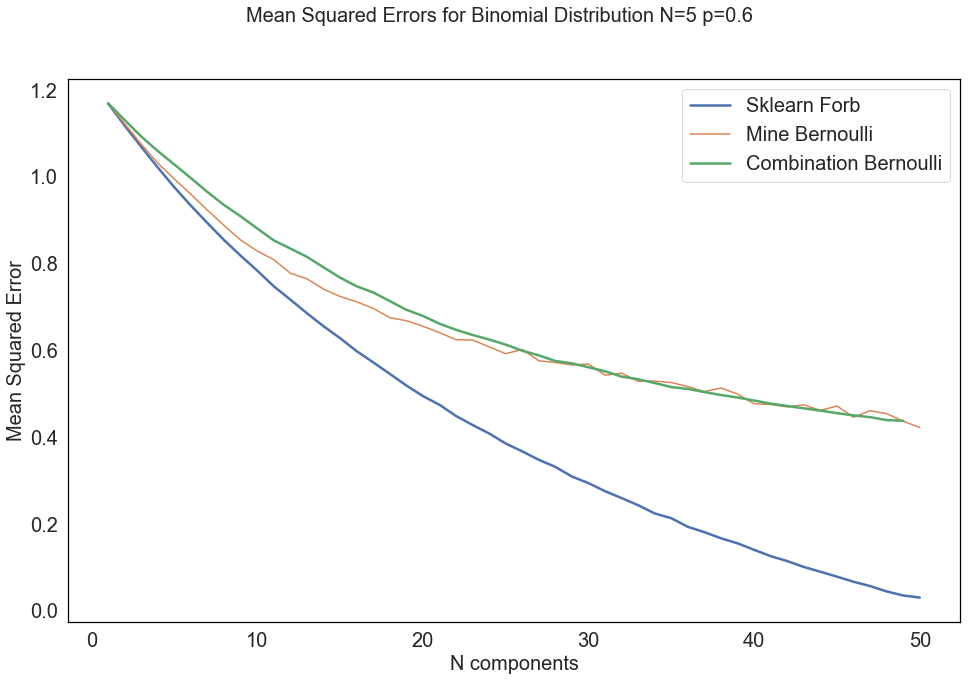

In [34]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine Bernoulli")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination Bernoulli", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Binomial Distribution N=5 p=0.6', fontsize = 20)
fig_1.savefig('BinomialGraphs/MeanSquaredErrorsForNMFBinomialFurther N=5 p=0.6.pdf')


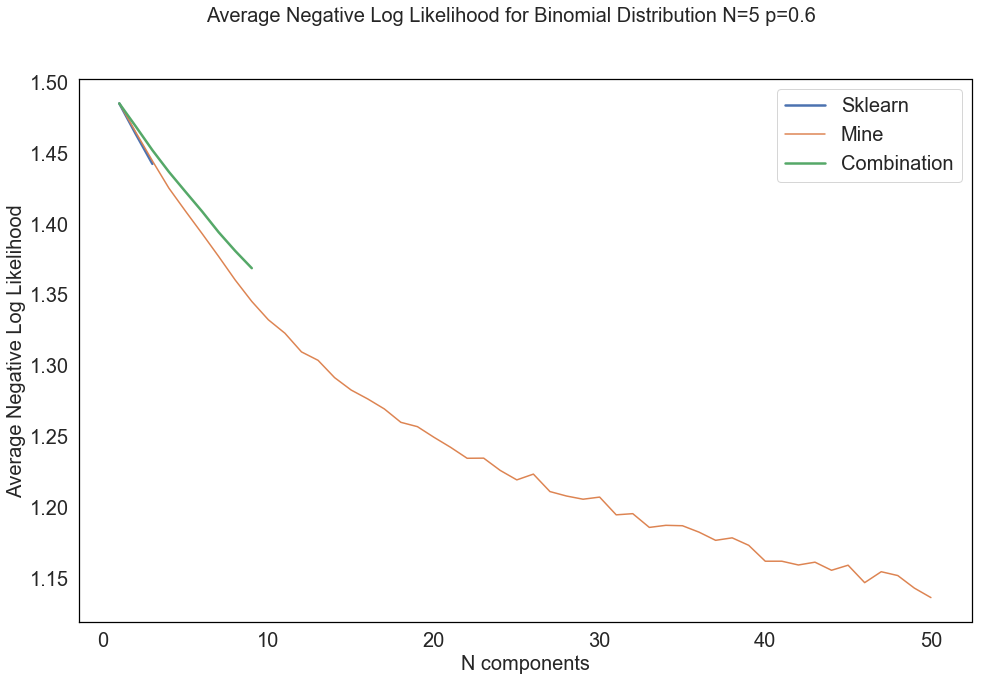

In [35]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Binomial Distribution N=5 p=0.6', fontsize = 20)
fig_1.savefig('BinomialGraphs/BinomialNMFAvgNegLogLikelihood N=5 p=0.6.pdf')

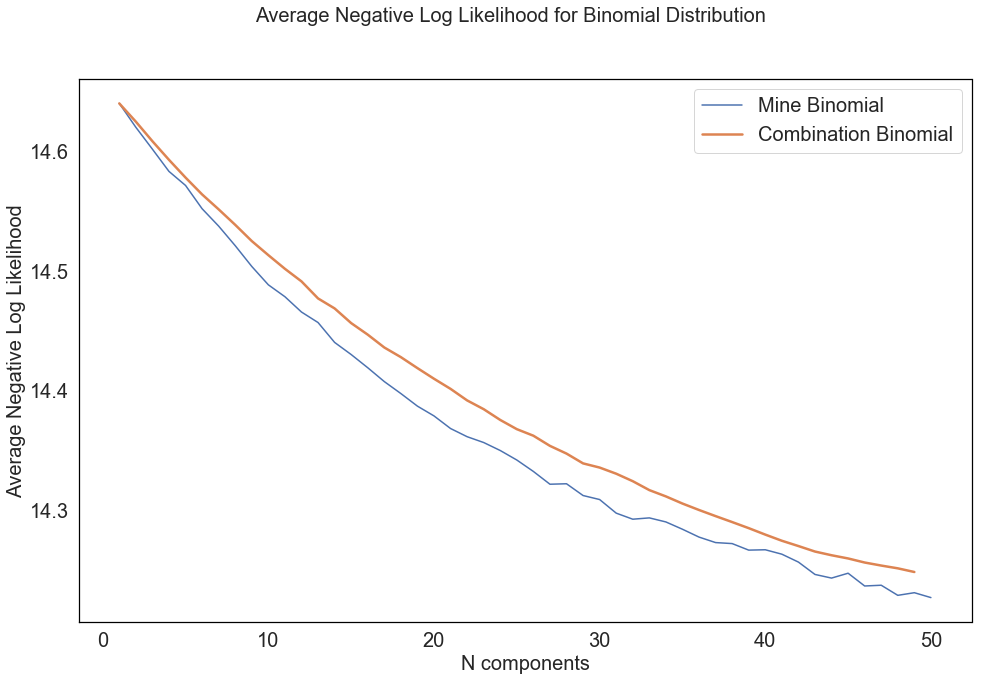

In [44]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine Binomial")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination Binomial", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Binomial Distribution', fontsize = 20)
fig_1.savefig('AverageNegativeLog LikelihoodForNMFBinomialFurther.pdf')

In [60]:
p = 0.4
rs = RandomState(76321654)
N = 5
V = binom.rvs(N,p, size = 10000,  random_state= rs).reshape(200,50)

In [61]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Binomial
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'binomial', N = N, phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Beinomial
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'binomial', N =N)
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_binom(V, Ws, Hs,N)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_binom(V, W, H,N)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_binom(V, W2 , H2,N)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


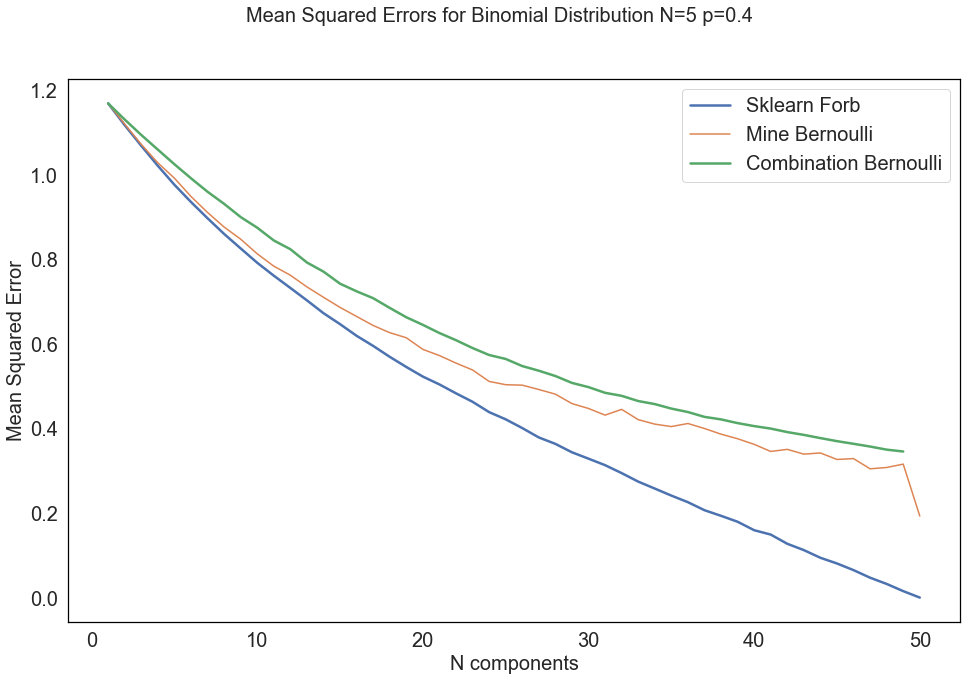

In [62]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine Bernoulli")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination Bernoulli", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Binomial Distribution N=5 p=0.4', fontsize = 20)
fig_1.savefig('BinomialGraphs/MeanSquaredErrorsForNMFBinomialFurther N=5 p=0.4.pdf')



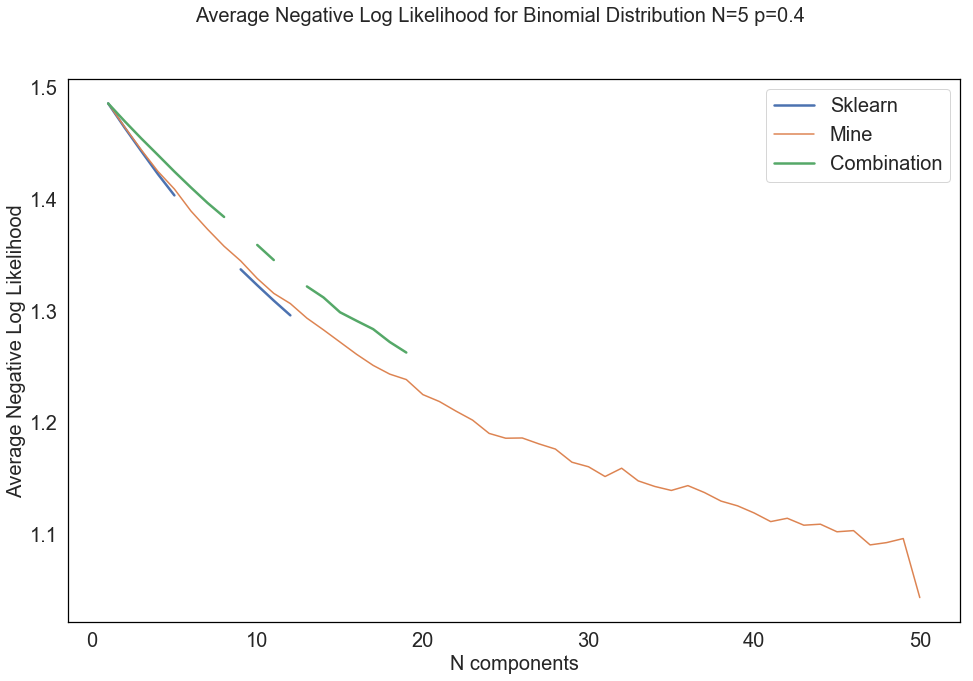

In [63]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Binomial Distribution N=5 p=0.4', fontsize = 20)
fig_1.savefig('BinomialGraphs/BinomialNMFAvgNegLogLikelihood N=5 p=0.4.pdf')

In [42]:
p = 0.4
rs = RandomState(76321654)
N = 10
V = binom.rvs(N,p, size = 10000,  random_state= rs).reshape(200,50)

In [43]:
errorssk = np.zeros(50)
errorsmy = np.zeros(50)
errorsComb = np.zeros(50)

lsk = np.zeros(50)
lmy = np.zeros(50)
lComb = np.zeros(50)



for n in range(1, 51):
    print(n)
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    
    #My  Binomial
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'binomial', N = N, phi_update=True)
    W, H = nmfM.fit_transform(V)
    
   
    
    #Combination Beinomial
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'binomial', N =N)
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
   
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
   
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsComb[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_likelihood_binom(V, Ws, Hs,N)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_likelihood_binom(V, W, H,N)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    
    diffM2 = neg_log_likelihood_binom(V, W2 , H2,N)
    lComb[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


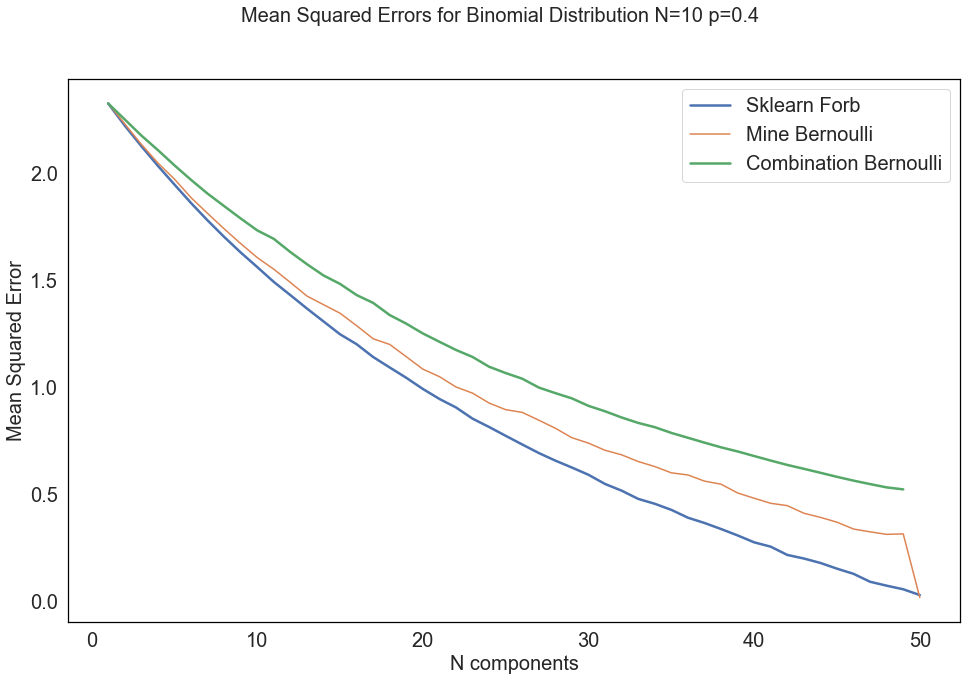

In [44]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 errorsmy, label="Mine Bernoulli")

ax_1.plot(np.arange(1, 50), 
                  errorsComb[:-1], label="Combination Bernoulli", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Binomial Distribution N=10 p=0.4', fontsize = 20)
fig_1.savefig('BinomialGraphs/MeanSquaredErrorsForNMFBinomialFurther N=10 p=0.4.pdf')




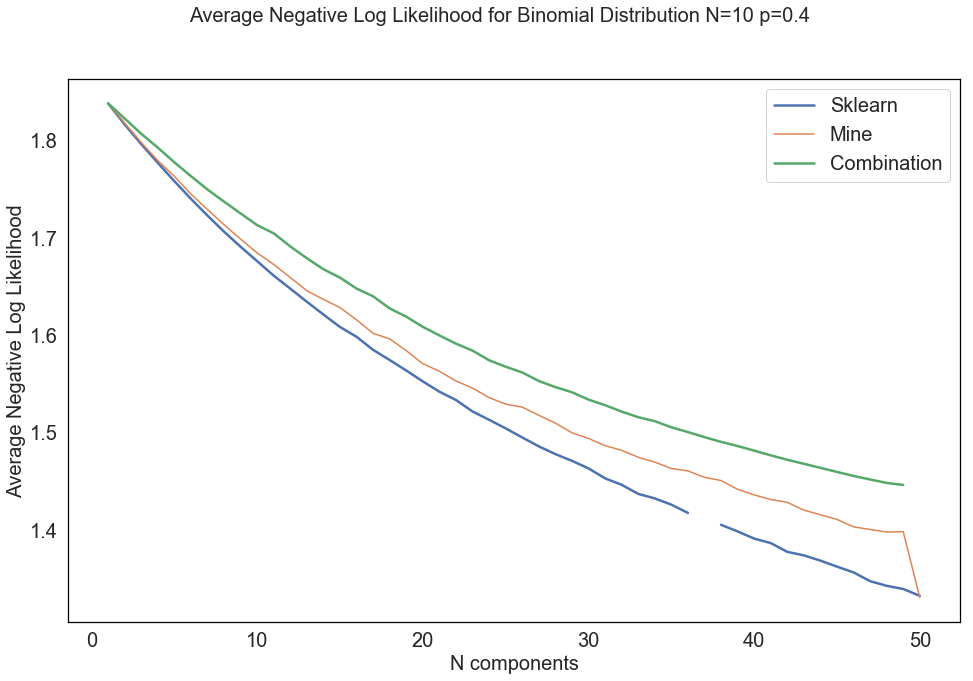

In [45]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)

ax_1.plot(np.arange(1, 51), 
                 lmy, label="Mine")

ax_1.plot(np.arange(1, 50), 
                 lComb[:-1], label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Average Negative Log Likelihood')
fig_1.suptitle('Average Negative Log Likelihood for Binomial Distribution N=10 p=0.4', fontsize = 20)
fig_1.savefig('BinomialGraphs/BinomialNMFAvgNegLogLikelihood N=10 p=0.4.pdf')

#### Check if the Average Negative Likelihhod is Minimized

In [46]:
p = 0.6
rs = RandomState(76321654)
n = 10
N = 10
V = binom.rvs(N,p, size = 10000,  random_state= rs).reshape(200,50)


In [47]:
max_iterations = np.arange(1,101)

errorsmy = np.zeros(100)
lmy = np.zeros(100)

errorsSK = np.zeros(100)
lSK = np.zeros(100)

errorsmyComb = np.zeros(100)
lmyComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it,N=N, distribution = 'binomial', phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it,N=N, distribution = 'binomial')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W2.dot(H2))
    errorsmyComb[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_likelihood_binom(V, W2, H2,N)
    lmyComb[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_likelihood_binom(V, W, H,N)
    lmy[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
    # Mean Squared Errors 
    
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorsSK[max_it-1] = diffS
    
    # Average Neg Log Likelihoods
    
    diffS = neg_log_likelihood_binom(V, Ws, Hs,N)
    lSK[max_it-1] = diffS / (V.shape[0] * V.shape[1])

In [48]:
lmy

array([1.90234042, 1.88683844, 1.87487893, 1.86468236, 1.85583096,
       1.84804564, 1.84111966, 1.8348969 , 1.82925708, 1.8241061 ,
       1.81936924, 1.81498648, 1.81090909, 1.80709713, 1.80351763,
       1.8001431 , 1.79695054, 1.79392055, 1.79103668, 1.7882849 ,
       1.78565319, 1.78313118, 1.78070991, 1.77838157, 1.77613933,
       1.77397721, 1.77188988, 1.76987266, 1.76792134, 1.76603216,
       1.76420174, 1.76242702, 1.76070522, 1.7590338 , 1.75741045,
       1.75583304, 1.75429962, 1.75280837, 1.75135761, 1.74994578,
       1.74857143, 1.74723319, 1.74592979, 1.74466002, 1.74342275,
       1.74221691, 1.74104147, 1.73989547, 1.73877798, 1.73768811,
       1.73662501, 1.73558787, 1.73457589, 1.73358832, 1.7326244 ,
       1.73168343, 1.7307647 , 1.72986754, 1.72899129, 1.7281353 ,
       1.72729894, 1.7264816 , 1.72568269, 1.72490162, 1.72413784,
       1.72339078, 1.72265993, 1.72194476, 1.72124478, 1.72055951,
       1.71988849, 1.71923126, 1.71858742, 1.71795654, 1.71733

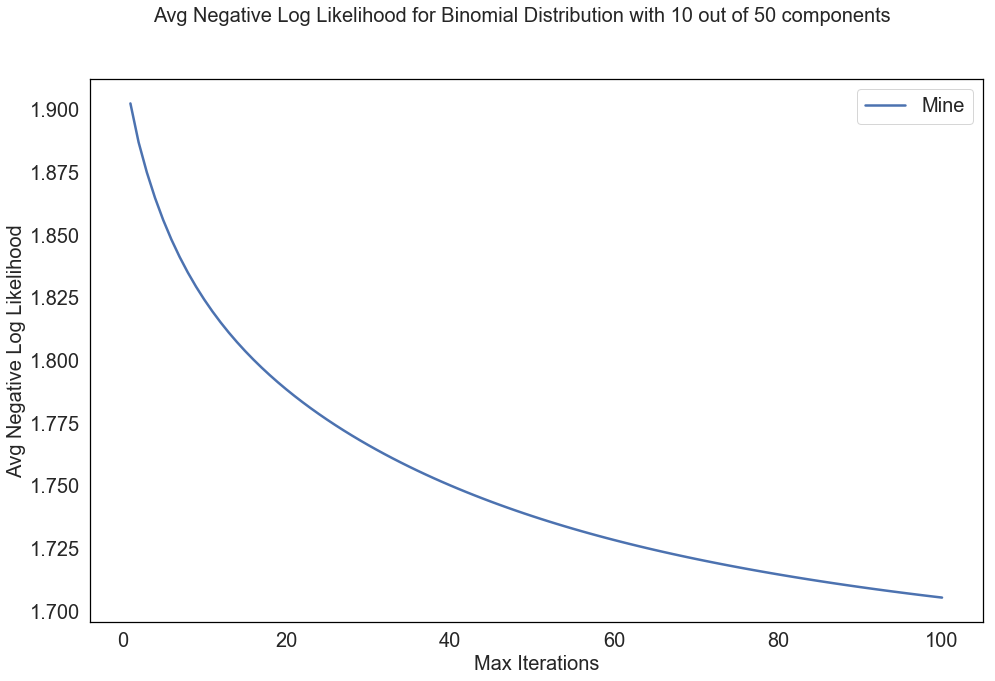

In [49]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  lmy, label="Mine", linewidth=2.5)


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Binomial Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('BinomialGraphs/AverageProbabilityNMFBinomialMaxIterationsFurther.pdf')

### Check If Bregman Divergences Deacreses

In [54]:
def bregman_div(V,W,H,N):
    
    A = W.dot(H) 
    
   
    indices = np.where(A>=N)
    A[indices] = N - 1e-5

    indices = np.where(A==0)
    A[indices] = 1e-5
   
    first_part = np.multiply(V, np.log( np.divide(V, A) + 1e-5 )) 
    
    
    second_part = np.multiply((N-V), np.log( np.divide((N-V),(N-A) ) + 1e-5 ) )
    breg = first_part + second_part
    
    breg[np.where(np.isnan(breg))] = np.nanmax(breg)
    
    total = np.sum(breg)
    
    return total

In [57]:
max_iterations = np.arange(1,101)

bregMy = np.zeros(100)
bregSK = np.zeros(100)
bregComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    print(max_it)
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'binomial',N=N, phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'binomial',N=N)
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Bregman Divergence Error Comb
    
    bregComb[max_it-1] = bregman_div(V, W2, H2,N)
    
    # Bregman Divergence Error My
    
    bregMy[max_it-1] = bregman_div(V, W, H,N)
    
     # Bregman Divergence Error Sklearn
    
    bregSK[max_it-1] = bregman_div(V, Ws, Hs,N)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


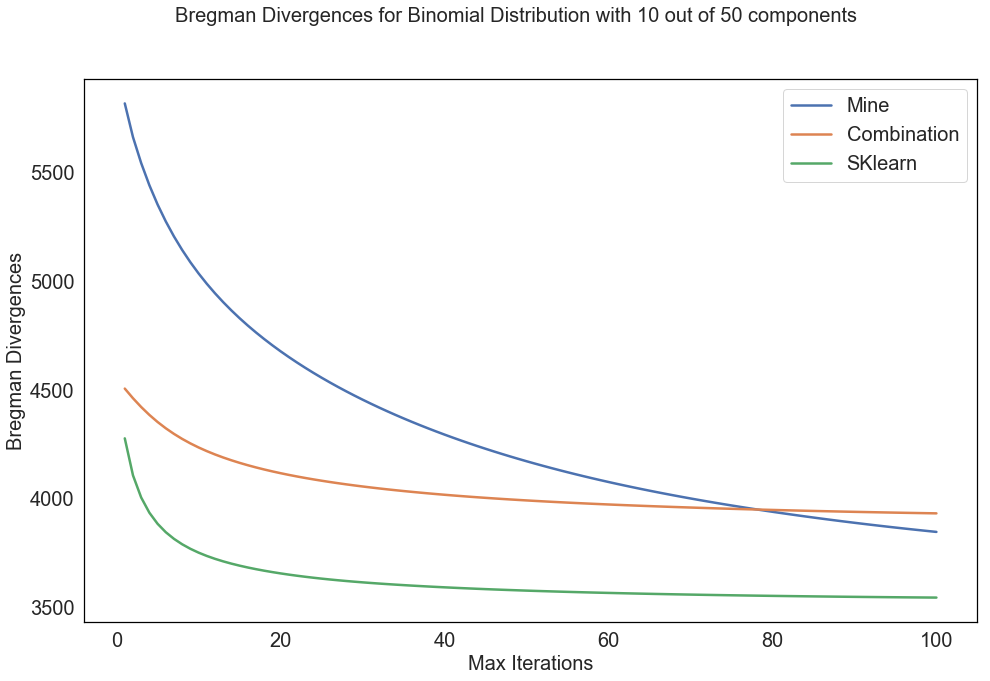

In [58]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Mine", linewidth=2.5)

ax_1.plot(max_iterations, 
                  bregComb, label="Combination", linewidth=2.5)

ax_1.plot(max_iterations, 
                  bregSK, label="SKlearn", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Binomial Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('BinomialGraphs/AverageProbabilityNMFBinomialMaxIterationsFurtherBregman.pdf')

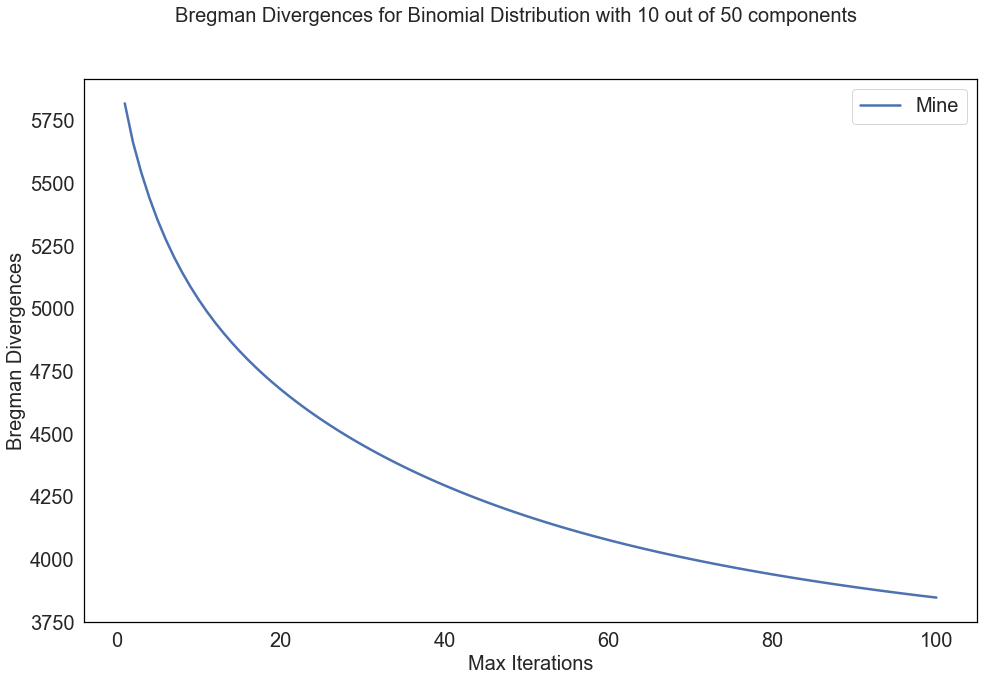

In [59]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Mine", linewidth=2.5)

#ax_1.plot(max_iterations, 
#                  bregComb, label="Combination", linewidth=2.5)


for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Binomial Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('AverageProbabilityNMFBinomialMaxIterationsFurtherBregman.pdf')